## MNIST Handwritten Digits Recognition Use case

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import seaborn as sns
import math
import matplotlib.pyplot as plt
import datetime
import platform

## Load the data

The **training** dataset consists of `60000 28x28 px` images of hand-written digits from `0` to `9`.

The **test** dataset consists of `10000 28x28 px` images.

In [ ]:
mnist_dataset = tf.keras.datasets.mnist

In [ ]:
mnist_dataset

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\think\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data() #array

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

![image.png](attachment:image.png)

In [ ]:
print('Shape of X_train:', x_train.shape)

Shape of X_train: (60000, 28, 28)


In [ ]:
x_train.ndim

3

In [ ]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)


In [ ]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
print("Train Digit labels are:",np.unique(y_train))

Train Digit labels are: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
print("Actual(Test) Digit labels are:",np.unique(y_test))

Actual(Test) Digit labels are: [0 1 2 3 4 5 6 7 8 9]


### Plotting some of the `train` sample digits

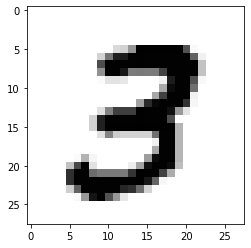

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap = plt.cm.binary)
plt.show()

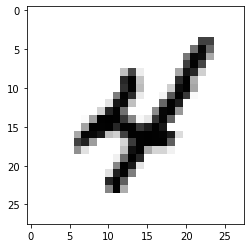

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[9], cmap = plt.cm.binary)
plt.show()

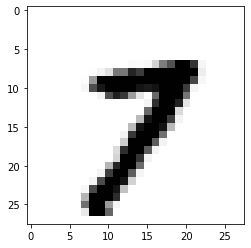

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[40000], cmap = plt.cm.binary)
plt.show()

### Plot  `a few` images

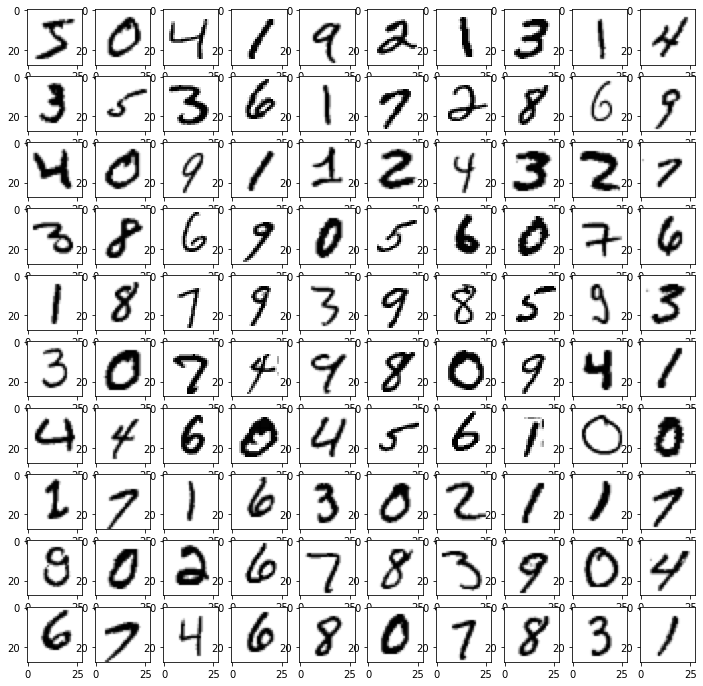

In [ ]:
n=100

num_cells = math.ceil(math.sqrt(n))
plt.figure(figsize=(12,12))

for i in range(n):
    plt.subplot(num_cells, num_cells, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

#### Task: Try to randomize the `training` set and plot random 100 0r 1000 handwritten digits

### Let us `normalize` the dataset --> move the range from `[0-255]` to `[0-1]`

In [ ]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
x_train_normalized.min(), x_train_normalized.max()

(0.0, 1.0)

#### `Before normalization`

In [ ]:
x_train.min(), x_train.max()

(0, 255)

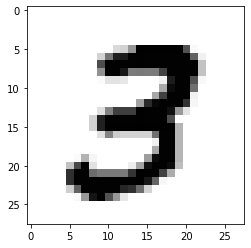

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap = plt.cm.binary)
plt.show()

#### `After normalization`

In [ ]:
x_train_normalized.min(), x_train_normalized.max()

(0.0, 1.0)

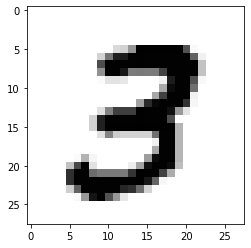

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train_normalized[7], cmap = plt.cm.binary)
plt.show()

# Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. `Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).`


In [ ]:
model = tf.keras.models.Sequential() #gives the linear stack of layers --> Model Object

In [ ]:
model

In [ ]:
### Input Layer
model.add(tf.keras.layers.Flatten(input_shape = x_train_normalized.shape[1:]))

### 1st Hidden Layer
model.add(tf.keras.layers.Dense(
        units=128,
        activation = tf.keras.activations.relu

))

### 2nd Hidden Layer
model.add(tf.keras.layers.Dense(
        units=128,
        activation = tf.keras.activations.relu

))


### Output Layer
model.add(tf.keras.layers.Dense(
        units = 10,
        activation = tf.keras.activations.softmax
))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model.compile(optimizer=adam_optimizer,
             loss = tf.keras.losses.sparse_categorical_crossentropy,
             metrics = ['accuracy'])

In [ ]:
### Train the model
training_hist = model.fit(x_train_normalized, y_train, epochs=20, validation_data=(x_test_normalized, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2782 - accuracy: 0.9201 - val_loss: 0.1937 - val_accuracy: 0.9469
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1852 - accuracy: 0.9508 - val_loss: 0.2357 - val_accuracy: 0.9386
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1640 - accuracy: 0.9568 - val_loss: 0.1807 - val_accuracy: 0.9599
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1447 - accuracy: 0.9621 - val_loss: 0.1739 - val_accuracy: 0.9522
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9661 - val_loss: 0.1636 - val_accuracy: 0.9593
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1243 - accuracy: 0.9682 - val_loss: 0.1821 - val_accuracy: 0.9626
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1144 - accuracy: 0.9709 - val_loss: 0.1664 - val_accuracy:

### TASKS [due date - 26th April 2025]

1. Play with this model by changing model's architecture configuration and `batch size`
2. Plot loss and accuracy - [training & validation] vs #epochs
3. Mix it up with different `batch sizes` and `learning_rate`
4. Also plot the `confusion matrix` and `roc curve` if possible